## <center>Numerikus integrálás és deriválás</center>

### Numerikus integrálás

Összetett kvadratúraformulák  <br><br>
- Érintő
$$I_{É, m}(f)=h\sum_{i=0}^{m-1}f\bigg(x_i+\frac{h}{2}\bigg)$$
    - Hibaformula
$$|I(f)-I_{É, m}(f)|\leq\frac{(b-a)^3}{24m^2}M_2$$
<br>
- Trapéz
$$I_{T, m}(f)= \frac{h}{2}\bigg(f(a)+2\sum_{i=1}^{m-1}f(x_i)+f(b)\bigg)$$
    - Hibaformula
$$|I(f)-I_{T, m}(f)|\leq\frac{(b-a)^3}{12m^2}M_2$$
<br>
- Simpson
$$I_{S, m}(f)= \frac{h}{6}\bigg(f(a)+4\sum_{i=0}^{m-1}f\left(x_i+\frac{h}{2}\right)+2\sum_{i=1}^{m-1}f(x_i)+f(b)\bigg)$$
     - Hibaformula
$$|I(f)-I_{S, m}(f)|\leq\frac{(b-a)^5}{2880m^4}M_4$$
<br>
<br>

Továbbá a fenti összetett Simpson-formulát $m$ páros mivolta esetén és $m/2$ részintervallumra alkalmazni, azaz ekkor

$$I_{S, m}= \frac{h}{3}\bigg(f(a)+2\sum_{\substack{i\ \text{ps} \\ i\neq 0,m}}f(x_i)+4\sum_{i\ \text{plan}}f(x_i)+f(b)\bigg)$$

<b>1.feladat.</b> Tekintsük az 

$$I(f)=\int_{4}^{5.2}\ln(x)\text{d}x$$

integrált. Közelítsük $I(f)$ értékét az érintőformulával, trapézforumlával és a Simpson-formulával! Becsüljük meg az egyes közelítések hibáját is!

In [1]:
% Erintoformula
format long
a = 4; 
b = 5.2; 
h = (b-a);
x = [a:h/2:b];
fv = log(x);
y = eval('fv');
erintoformula = h*y(2)

erintoformula =  1.831267564194059


In [2]:
%% Trapezformula
trapezformula = h*(y(1)+y(3))/2

trapezformula =  1.820971792024364


In [3]:
%% Simpson-formula
simpsonformula = h*(y(1)+4*y(2)+y(3))/6

simpsonformula =  1.827835640137494


In [4]:
m=1;
%% Erinto hibaja
M_2 = 1/16;
erinto_hiba = ((b-a)^3/(24*m^2))*M_2

%% Trapez hibaja
M_2 = 1/16;
trapez_hiba = ((b-a)^3/(12*m^2))*M_2

%% Simpson hibaja
M_4 = 3/128;
simpson_hiba = ((b-a)^5/(2880*m^4))*M_4

erinto_hiba =    4.500000000000002e-03
trapez_hiba =    9.000000000000005e-03
simpson_hiba =    2.025000000000001e-05


<br>
<b>2.feladat.</b> Írjunk programot <i>kvadratura.m</i> néven, mely kiszámítja az $f(x)$ függvény közelítõ integrálját $m$ részre történő részintervallumra bontással a fenti összetett formulákkal.

<br> Alkalmazzuk a programunkat az előző feladatra!

In [5]:
kvadratura(4,5.2,1,'log(x)','erinto')
kvadratura(4,5.2,1,'log(x)','trapez') % Trapez eseten m = m
kvadratura(4,5.2,2,'log(x)','Simpson') % Simspon eseten itt 2*m-et kell megadni


A feladat megoldasa 1 reszintervallumon osszetett erintoformulaval tortent.
ans =  1.831267564194059

A feladat megoldasa 1 reszintervallumon osszetett trapezformulaval tortent.
ans =  1.820971792024364

A feladat megoldasa 1 reszintervallumon osszetett Simpson-formulaval tortent.
ans =  1.827835640137494


In [6]:
kvadratura(4,5.2,6,'log(x)','erinto')
kvadratura(4,5.2,6,'log(x)','trapez') % Trapez eseten m = m
kvadratura(4,5.2,12,'log(x)','Simpson') % Simspon eseten itt 2*m-et kell megadni


A feladat megoldasa 6 reszintervallumon osszetett erintoformulaval tortent.
ans =  1.827943529349786

A feladat megoldasa 6 reszintervallumon osszetett trapezformulaval tortent.
ans =  1.827655138682034

A feladat megoldasa 6 reszintervallumon osszetett Simpson-formulaval tortent.
ans =  1.827847399127202


<br>
<b>3.feladat.</b> Hány részintervallumra kell osztani a $[0,\ \pi/4]$ intervallumot, ha az 

$$I(f)=\int_{0}^{\pi/4}\ln(\cos(x))\text{d}x$$

integrál értékét összetett trapézformulával szeretnénk közelíteni úgy, hogy a hiba (felhasználó által előírt tolerancia TOL) értéke kisebb legyen, mint $10^{-4}$?

In [7]:
a = 0; b = pi/4; 
TOL = 1e-4;
M_2 = 2;
% Hiba ((b-a)^3/(12*m^2))*M_2 < TOL

m = sqrt((((b-a)^3/(12))*M_2)/TOL)
m = ceil(m)

m =  28.41575481810764
m =  29


<br>
<b>4.feladat.</b> Tanulmányozzuk a beépített <i>trapz</i>, <i>quad</i> és <i>quadk</i> parancsokat!

In [8]:
%% Megfelelo help parancsok tanulmanyozasa: helo trapz, help quad, ...
help trapz
% Beepitett Trapez
x = 4:0.1:5.2;
beepitett_trapez = trapz (x,log(x))
% Kvadratura formula
quadratura = quad (@(x) log(x), 4, 5.2)
% Adaptiv Gauss-Konrod kvadratura
adaptiv_gauss_konrod = quadgk (@(x) log(x), 4, 5.2)

'trapz' is a function from the file /Applications/Octave-5.1.0.app/Contents/Resources/usr/Cellar/octave-octave-app@5.1.0/5.1.0/share/octave/5.1.0/m/general/trapz.m

 -- Q = trapz (Y)
 -- Q = trapz (X, Y)
 -- Q = trapz (..., DIM)

     Numerically evaluate the integral of points Y using the trapezoidal
     method.

     'trapz (Y)' computes the integral of Y along the first
     non-singleton dimension.  When the argument X is omitted an equally
     spaced X vector with unit spacing (1) is assumed.  'trapz (X, Y)'
     evaluates the integral with respect to the spacing in X and the
     values in Y.  This is useful if the points in Y have been sampled
     unevenly.

     If the optional DIM argument is given, operate along this
     dimension.

     Application Note: If X is not specified then unit spacing will be
     used.  To scale the integral to the correct value you must multiply
     by the actual spacing value (deltaX). As an example, the integral
     of x^3 over the range [

### Numerikus deriválás

<br>
<b>5.feladat.</b> Írjunk olyan programot, mely az alábbi 

+ $\displaystyle \frac{f(x_0+h)-f(x_0)}{h}$<br>
+ $\displaystyle \frac{f(x_0+h)-f(x_0-h)}{2h}$<br>
+ $\displaystyle \frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}$<br>

véges differenciahányadokosat kiszámolja adott függvényre, adott pontban és adott lépésközzel. Eredményeinket vessük össze a megfelelő derivált értékekkel!

In [9]:
[elso, elsoketto, masodik] = derivalt(@(x)(sin(x)),0.4,0.1)


elso =    9.000719629555248e-01
elsoketto =    9.195266597143170e-01
masodik =   -3.890939351758437e-01


ans =

   2  -1   0   0   0   0
  -1   2  -1   0   0   0
   0  -1   2  -1   0   0
   0   0  -1   2  -1   0
   0   0   0  -1   2  -1
   0   0   0   0  -1   2



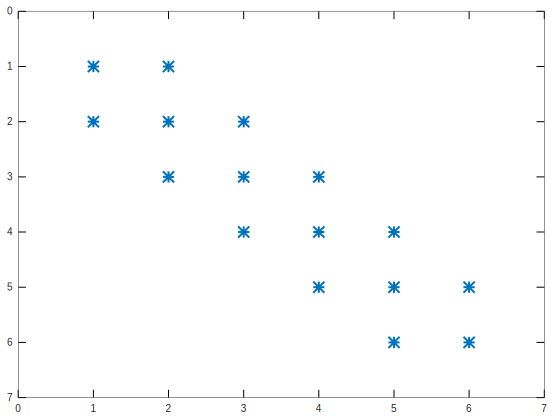

In [10]:
% spdiags parancs hasznalata
n=6;
e=ones(n,1);
A=spdiags([-e 2*e -e], [-1, 0, 1], n,n);
full(A)
spy(A);